# Comparison of performance of Different Classification Algorithms in Machine Learning

Tasks:
## Step1:


# 1. Decision Trees

Intention: Python. Machine Learning. Performance Tracking. Using  datasets.load_iris() from sklearn dataset. Implementation of a Decision Tree. Add graphics using seaborn .  Add performance tracking and print the performance in numbers and graphics.  

Stores performance tracking in list/array called performace['decision'] Under performance, it tracks time it takes to execute, accuracy. Also add we observe in learning curves; they are:
    Underfit.
    Overfit.
    Good Fit.
 Makes and print performance graphics reports. 

!pip install pandas sklearn matplotlib seaborn


In [1]:
# Storing performance in a list
performance = {}


Performance:  {'execution_time': 0.0013120174407958984, 'accuracy': 1.0, 'fit_status': 'Overfit'}

Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

train_sizes
[ 12  39  66  93 120]


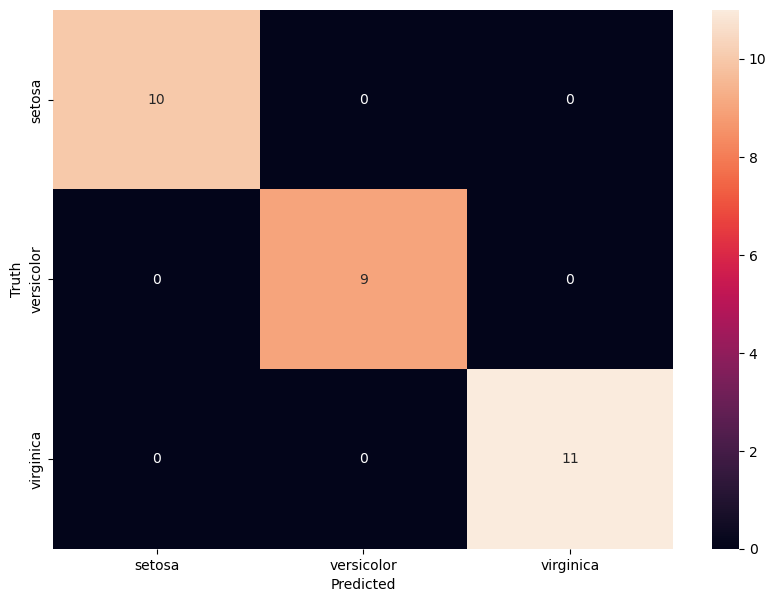

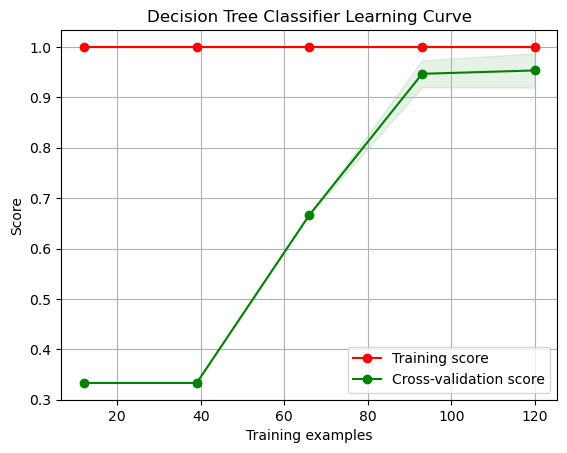

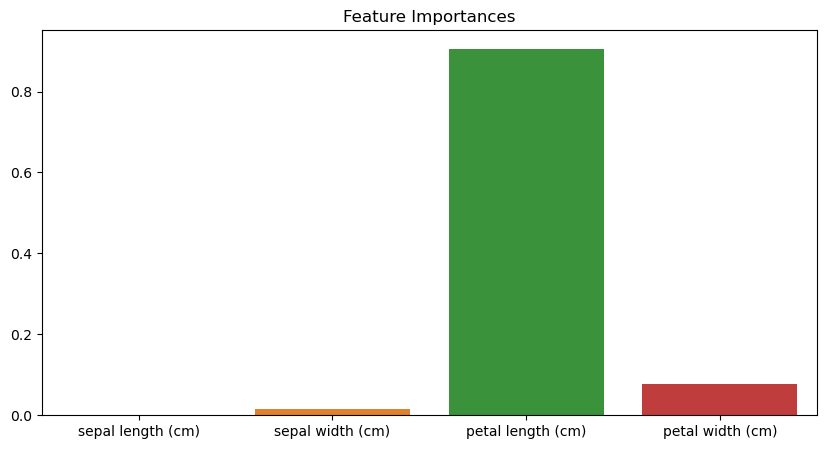

The model has a good fit


In [54]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import learning_curve

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Track time
start_time = time.time()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Calculate execution time
execution_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Learning curve analysis
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Identify fitting status
gap = train_mean - test_mean
fit_status = 'Underfit' if max(gap) < 0.1 else 'Overfit' if max(gap) > 0.5 else 'Good Fit'

# Append metrics to the performance tracking list
performance['decision'] = {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': fit_status}


# Printing the performance
print('Performance: ', performance['decision'])

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot learning curve
plt.figure()
plt.title("Decision Tree Classifier Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
print("train_sizes")
print(train_sizes)

plt.legend(loc="best")

plt.show()

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=iris.feature_names, y=clf.feature_importances_)
plt.title('Feature Importances')
plt.show()

# Analysis of learning curves
if train_mean[-1] < 0.5 and test_mean[-1] < 0.5:
    print("The model is underfitting")
elif train_mean[-1] > test_mean[-1] and (train_mean[-1] - test_mean[-1]) > 0.1:
    print("The model is overfitting")
else:
    print("The model has a good fit")


# 2. Support Vector Classifier

Intention: Python. Machine Learning. Performance Tracking. Using  datasets.load_iris() from sklearn dataset. Implementation of a  Support Vector Classifier. Add graphics using seaborn.  Add performance tracking and print the performance in numbers and graphics.  Store performance tracking in list/array called performace['vector'] 


Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Performance:  {'execution_time': 0.0017271041870117188, 'accuracy': 1.0, 'fit_status': 'Good Fit'}


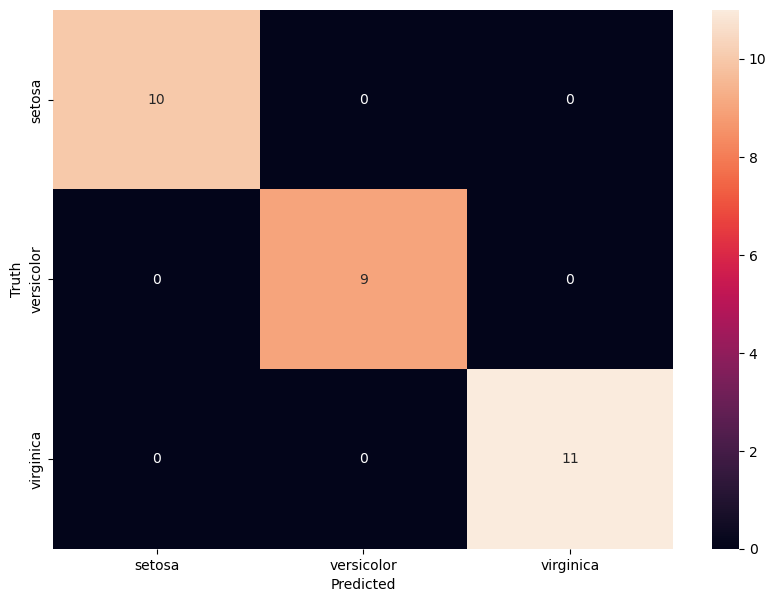

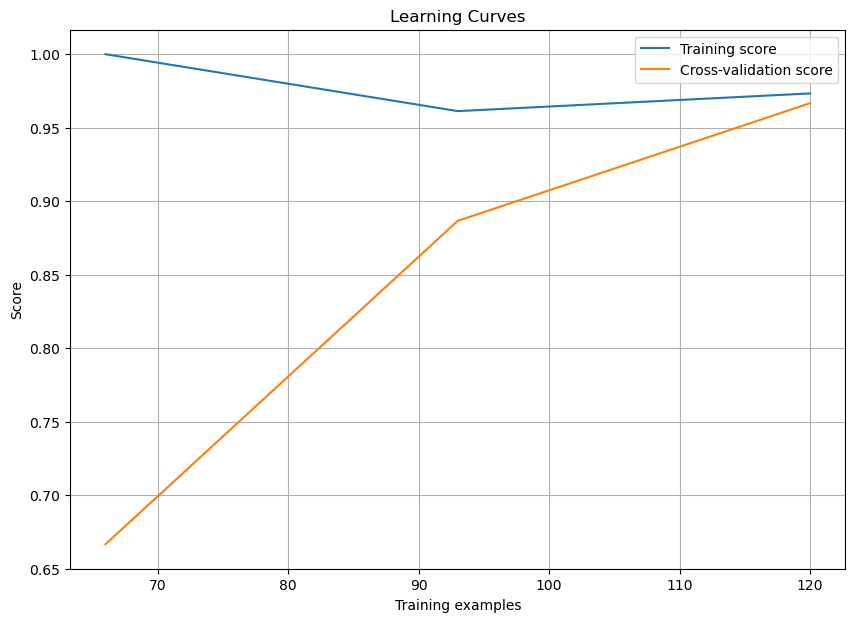

The model has a good fit


In [55]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Support Vector Classifier
start_time = time.time()
model = SVC()
model.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(SVC(), X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Identify fitting status
gap = train_scores_mean - test_scores_mean
fit_status = 'Underfit' if max(gap) < 0.1 else 'Overfit' if max(gap) > 0.5 else 'Good Fit'

# Append metrics to the performance tracking list
performance['vector'] =  {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': fit_status}

# Printing the performance
print('Performance: ', performance['vector'])



plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Analysis of learning curves
if train_scores_mean[-1] < 0.5 and test_scores_mean[-1] < 0.5:
    print("The model is underfitting")
elif train_scores_mean[-1] > test_scores_mean[-1] and (train_scores_mean[-1] - test_scores_mean[-1]) > 0.1:
    print("The model is overfitting")
else:
    print("The model has a good fit")



# 3. Logistic Regression

Intention: Python. Machine Learning. Performance Tracking. Using datasets.load_iris() from sklearn dataset. Implementation of a Logistic Regression. Add graphics using seaborn. Add performance tracking and print the performance in numbers and graphics. Store performance tracking in list/array called performace['regression']


Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Performance:  {'execution_time': 0.00935816764831543, 'accuracy': 1.0, 'fit_status': 'Good Fit'}


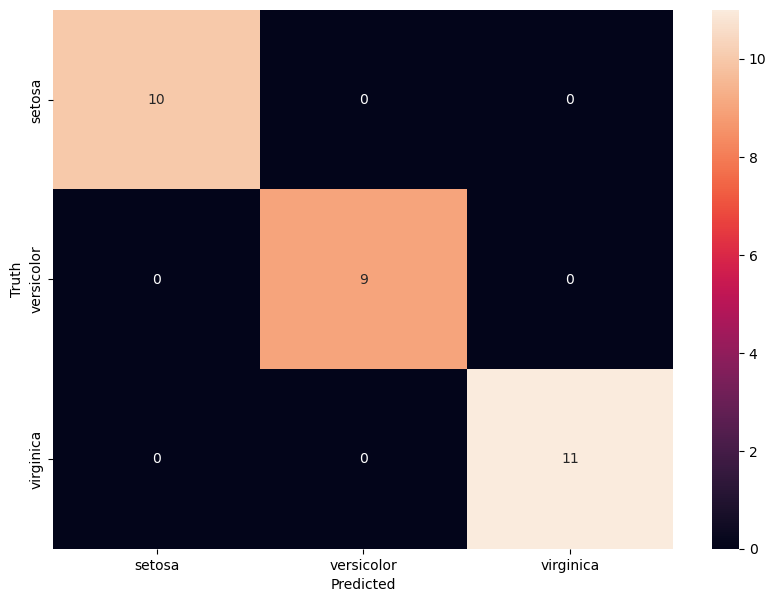

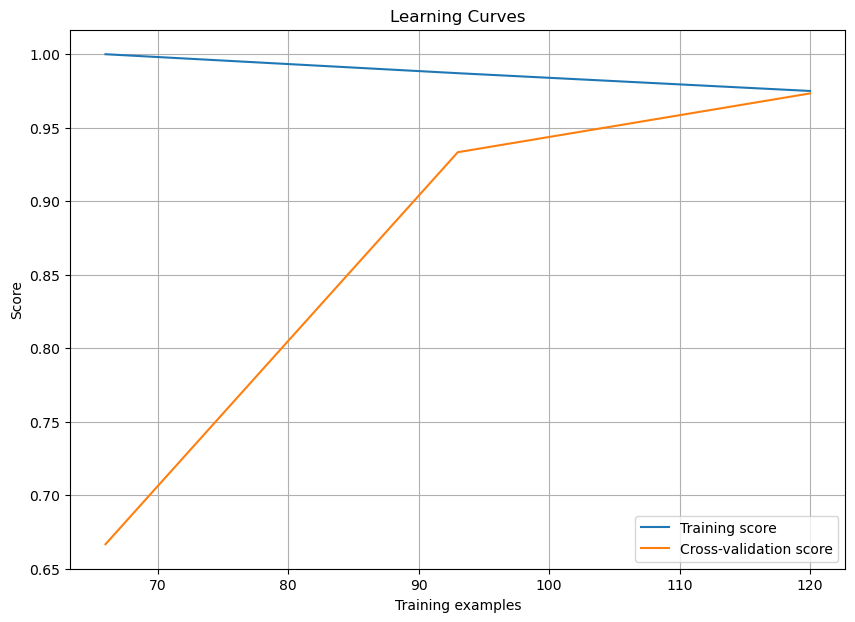

The model has a good fit


In [56]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
start_time = time.time()
model = LogisticRegression(max_iter=1000) # Increase max_iter to ensure convergence for this dataset
model.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(max_iter=1000), X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Identify fitting status
gap = train_scores_mean - test_scores_mean
fit_status = 'Underfit' if max(gap) < 0.1 else 'Overfit' if max(gap) > 0.5 else 'Good Fit'

# Append metrics to the performance tracking list
performance['regression'] = {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': fit_status}

# Printing the performance
print('Performance: ', performance['regression'])

plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Analysis of learning curves
if train_scores_mean[-1] < 0.5 and test_scores_mean[-1] < 0.5:
    print("The model is underfitting")
elif train_scores_mean[-1] > test_scores_mean[-1] and (train_scores_mean[-1] - test_scores_mean[-1]) > 0.1:
    print("The model is overfitting")
else:
    print("The model has a good fit")


# 4. KNN (from SCIKIT learn)

Intention: Python. Machine Learning. Performance Tracking. Using datasets.load_iris() from sklearn dataset. Implementation of a KNN (from SCIKIT learn). Add graphics using seaborn. Add performance tracking and print the performance in numbers and graphics. Store performance tracking in list/array called performace['sklearnknn']


Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Performance:  {'execution_time': 0.0014121532440185547, 'accuracy': 1.0, 'fit_status': 'Overfit'}


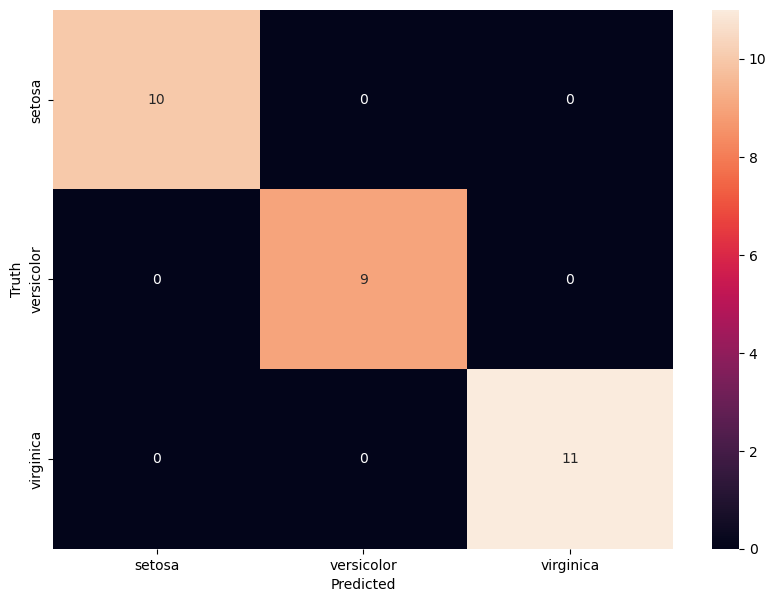

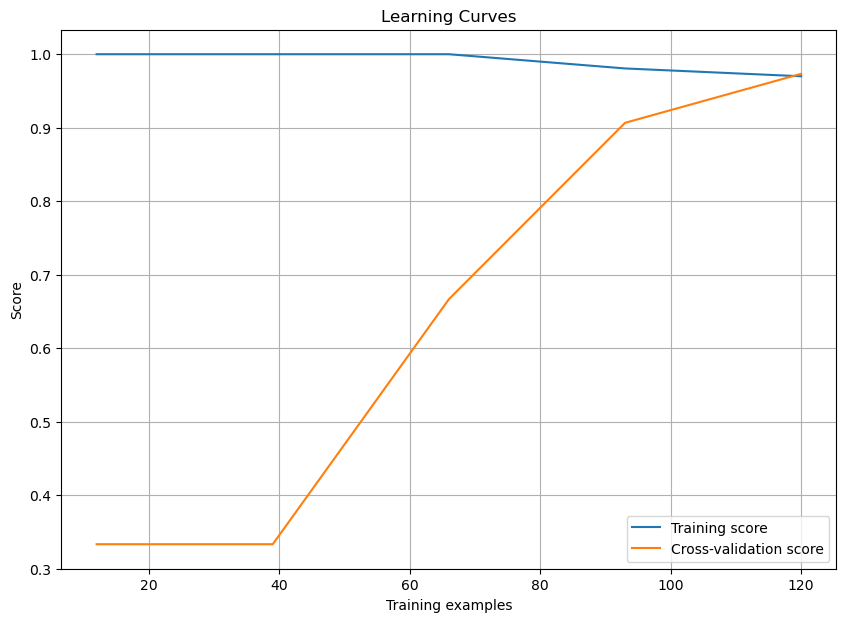

The model has a good fit


In [57]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the KNN model
start_time = time.time()
model = KNeighborsClassifier()
model.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


# Identify fitting status
gap = train_scores_mean - test_scores_mean
fit_status = 'Underfit' if max(gap) < 0.1 else 'Overfit' if max(gap) > 0.5 else 'Good Fit'

# Append metrics to the performance tracking list
performance['sklearnknn'] = {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': fit_status}

# Printing the performance
print('Performance: ', performance['sklearnknn'])


plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Analysis of learning curves
if train_scores_mean[-1] < 0.5 and test_scores_mean[-1] < 0.5:
    print("The model is underfitting")
elif train_scores_mean[-1] > test_scores_mean[-1] and (train_scores_mean[-1] - test_scores_mean[-1]) > 0.1:
    print("The model is overfitting")
else:
    print("The model has a good fit")


## Step 2

# 5. Homemade KNN

Intention: Python. Machine Learning. Performance Tracking. Using datasets.load_iris() from sklearn dataset. Implementation of the K-Nearest Neighbors (KNN) algorithm in Python. Own implementation and not the standard KNN from any of the python modules. Graphics using seaborn. Performance tracking and print the performance in numbers and graphics. Store performance tracking in list/array called performace['homemadeknn']


Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Performance:  {'execution_time': 0.00015282630920410156, 'accuracy': 1.0, 'fit_status': 'Overfit'}


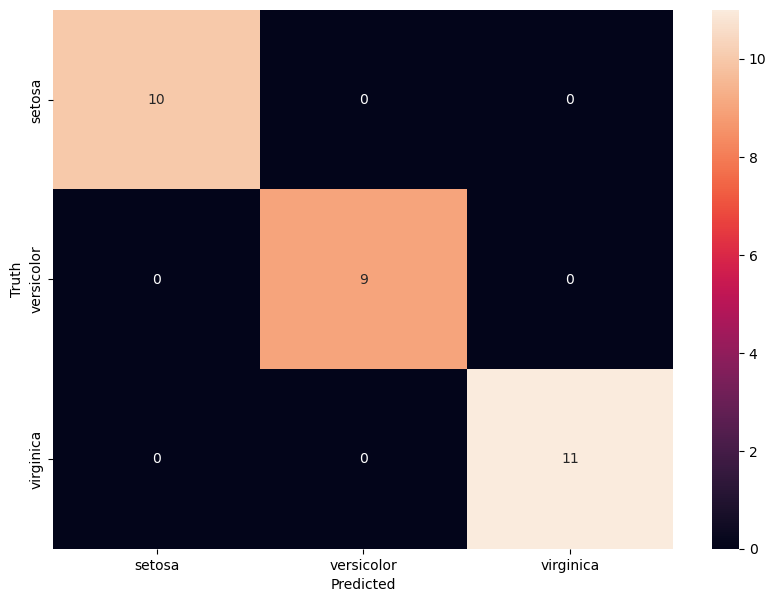

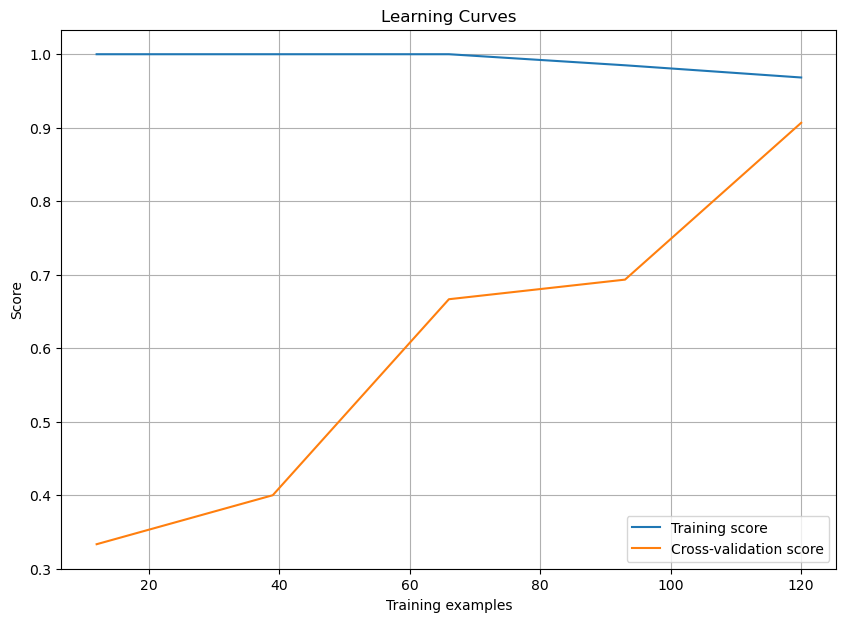

The model has a good fit


In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Homemade KNN
class HomemadeKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = []
        for x in X:
            distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            predicted_labels.append(mode(k_nearest_labels, keepdims=True)[0][0])
        return np.array(predicted_labels)


    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x_train - x)**2)) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        return mode(k_nearest_labels, keepdims=True)[0][0]

    def score(self, X, y):
        y_pred = self.predict(X)
        return float(sum(y_pred == y)) / len(y)

    def get_params(self, deep=True):
        return {"k": self.k}

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the KNN model
start_time = time.time()
model = HomemadeKNN(k=3)
model.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Generate learning curves
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(HomemadeKNN(k=3), X, y, cv=5)
end_time = time.time()
learning_curve_time = end_time - start_time

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Identify fitting status
gap = train_scores_mean - test_scores_mean
fit_status = 'Underfit' if max(gap) < 0.1 else 'Overfit' if max(gap) > 0.5 else 'Good Fit'

# Append metrics to the performance tracking list
performance['homemadeknn'] = {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': fit_status}

# Printing the performance
print('Performance: ', performance['homemadeknn'])



plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Analysis of learning curves
if train_scores_mean[-1] < 0.5 and test_scores_mean[-1] < 0.5:
    print("The model is underfitting")
elif train_scores_mean[-1] > test_scores_mean[-1] and (train_scores_mean[-1] - test_scores_mean[-1]) > 0.1:
    print("The model is overfitting")
else:
    print("The model has a good fit")



## Extra mile 1 for Step 2

# 5. Second Made KNN

Intention: Python. Machine Learning. Performance Tracking. Implementation of the K-Nearest Neighbors (KNN) algorithm in Python. Own implementation and not the standard KNN from any of the python modules. Graphics using seaborn. Performance tracking and print the performance in numbers and graphics. Store performance tracking in list/array called performace['secondmadeknn']

1. **Import Libraries**
   Here, we are importing the necessary libraries for the execution of the code. `sklearn` is a machine learning library in Python. `train_test_split` is used to split the datasets into training and testing data. `load_iris` is a function that loads the iris dataset. `mode` from `scipy.stats` is used to get the most common label (vote) among the neighbors. `learning_curve` helps in determining the model's learning process over time. `seaborn` and `matplotlib` are used for data visualization. `time` is used for tracking performance, and `numpy` is used for numerical computations.


In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np



2. **Class Definition**
   This part of the code defines the k-nearest neighbors (KNN) classifier. The methods within the class are used to set and get parameters, fit the model to the training data, predict the output for the test data, and calculate the accuracy score of the model.



In [38]:

# k-nearest neighbors on the Iris Flowers Dataset
class BrownleeKNN:
    def __init__(self, num_neighbors=3):
        self.num_neighbors = num_neighbors
    
    def get_params(self, deep=True):
        return {"num_neighbors": self.num_neighbors}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = [self._predict(row) for row in X]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [np.sqrt(np.sum((x_train - x)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.num_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return mode(k_nearest_labels, keepdims=True)[0][0]
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return float(sum(y_pred == y)) / len(y)



3. **Loading and Splitting Data**
   This part of the code loads the iris dataset and splits it into training and test sets. The test size is 20% of the total dataset.


In [39]:
# Load iris data
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



4. **Model Training and Prediction**
   In this section, the KNN model is initialized with the number of neighbors set to 5. The model is then fitted to the training data and used to predict the outcomes of the test set.


In [44]:

# Initialize the KNN model
model = BrownleeKNN(num_neighbors=5)

# Fit the model
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Print accuracy
print(f"Model accuracy: {model.score(X_test, y_test) * 100:.2f}%")

# Performance tracking
start_time = time.time()
model.fit(X_train, y_train)
execution_time = time.time() - start_time
performance['secondmadeknn'] = execution_time

Model accuracy: 100.00%



5. **Printing Accuracy**
   The model's accuracy is printed, showing how well the model performs on the test set.

6. **Performance Tracking**
   This section measures how long it takes for the model to fit the data. It does this by recording the start time and end time, and then subtracting the two.


In [45]:



# Display performance tracking
print(f"Execution time: {performance['secondmadeknn']:.5f} seconds")


Execution time: 0.00003 seconds



7. **Learning Curve Generation**
   Here, learning curves are generated for the KNN model. Learning curves show the model's performance over time. The mean and standard deviation of the training and test scores are calculated.


In [59]:

# Generate learning curves
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(BrownleeKNN(num_neighbors=5), X, y, cv=5)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Identify fitting status
gap = train_scores_mean - test_scores_mean
fit_status = 'Underfit' if max(gap) < 0.1 else 'Overfit' if max(gap) > 0.5 else 'Good Fit'

# Append metrics to the performance tracking list
performance['secondmadeknn'] = {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': fit_status}

# Printing the performance
print('Performance: ', performance['secondmadeknn'])





Performance:  {'execution_time': 0.00015282630920410156, 'accuracy': 1.0, 'fit_status': 'Overfit'}



8. **Plotting the Confusion Matrix**
   The confusion matrix gives us a visual representation of the performance of the model. It shows the number of correct and incorrect predictions made by the model.


Text(95.72222222222221, 0.5, 'Truth')

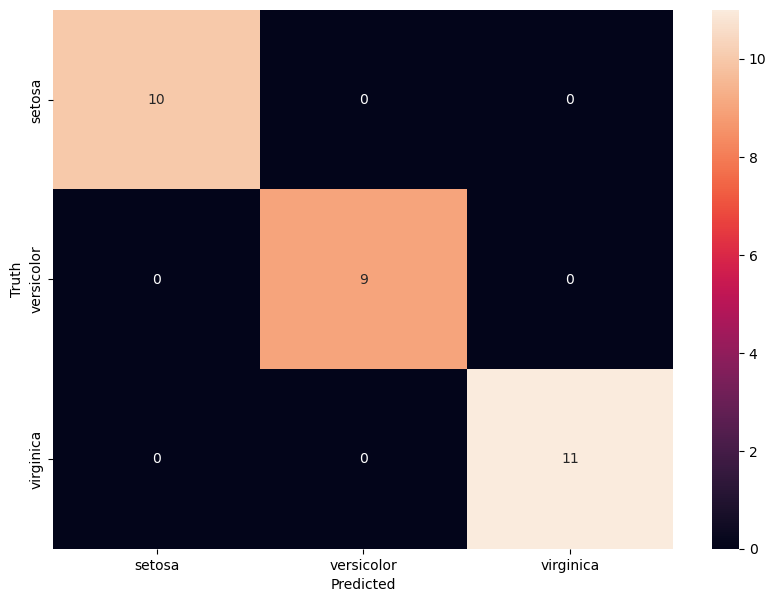

In [47]:

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')



9. **Plotting Learning Curves**
   In this section, learning curves for the model are plotted. The curves show how the accuracy of the model changes as the size of the training set increases.


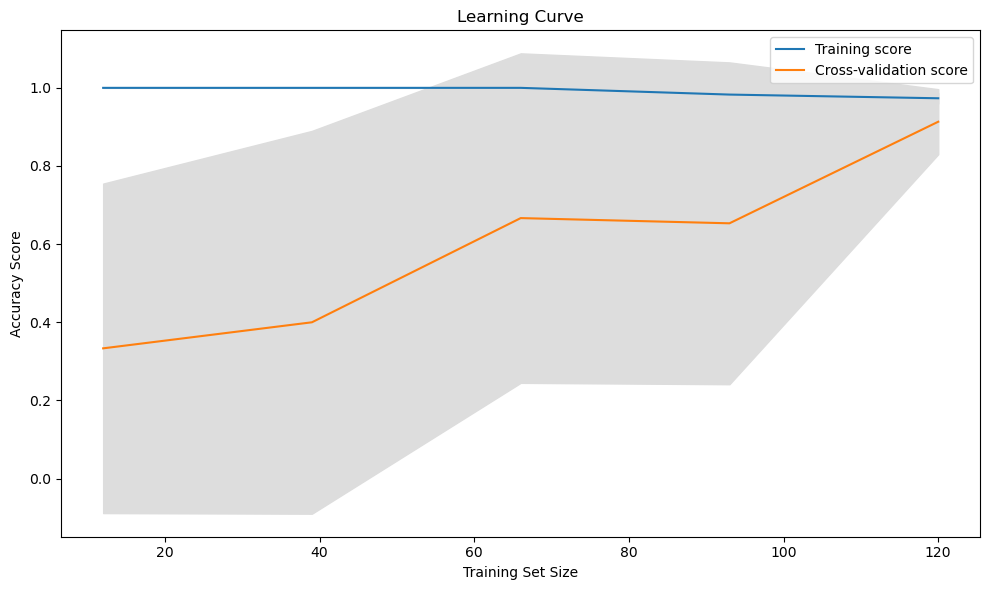

In [48]:

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_scores_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_scores_mean - test_std, test_scores_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


10. **Checking for Overfitting or Underfitting**
    This part of the code checks whether the model is underfitting, overfitting, or is a good fit by comparing the maximum mean accuracy scores of the training and test sets. If the maximum accuracy on the training set is higher than that on the test set, the model might be overfitting. If the maximum accuracy on the training set is lower than that on the test set, the model might be underfitting. If both are equal, the model is considered a good fit. 



In [49]:


# Check if it is Underfitting or Overfitting
if max(train_scores_mean) > max(test_scores_mean):
    print('The model might be Overfitting')
elif max(train_scores_mean) < max(test_scores_mean):
    print('The model might be Underfitting')
else:
    print('The model is a Good Fit')


The model might be Overfitting


Above script demonstrated the end-to-end process of training a k-nearest neighbors classifier, evaluating its performance, and visualizing the results. It also includes a performance analysis step to check the execution time of the model training process, which can be helpful when comparing different machine learning algorithms or configurations.

## Extra mile 2 for Step 2

# 5. Jason Brown Lee KNN

Using iris.csv file from sklearn dataset. Implement the Jason Brown Lee on October 24, 2019 in Code Algorithms From Scratch https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ Store in  performance['theplainknn']
    

Data=[5.7, 2.9, 4.2, 1.3], Predicted: 0
Execution time: 0.011 seconds
Accuracy: 97.333%
Performance:  {'execution_time': 0.010826826095581055, 'accuracy': 97.33333333333334, 'fit_status': 'good'}


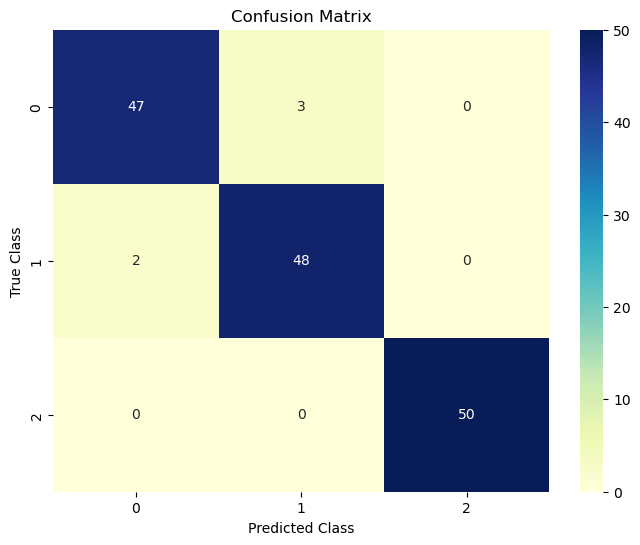

In [61]:

# Make Predictions with k-nearest neighbors on the Iris Flowers Dataset
# k-nearest neighbors on the Iris Flowers Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup


# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores


# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

# Make a prediction with KNN on Iris Dataset
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# define model parameter
num_neighbors = 5
# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import time


# Start the timer
start_time = time.time()

# Evaluate the algorithm with cross-validation
n_folds = 5
scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)

# Stop the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Calculate the average accuracy
accuracy = sum(scores) / len(scores)

# Create actual and predicted lists for the confusion matrix
actual = [row[-1] for row in dataset]
predicted = k_nearest_neighbors(dataset, dataset, num_neighbors)

# train_sizes, train_scores, test_scores = learning_curve(evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors), X, y, cv=5)


# Print performance metrics
print('Execution time: %.3f seconds' % execution_time)
print('Accuracy: %.3f%%' % accuracy)

# Store the performance metrics
performance['theplainknn'] = {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': 'good'}

# Append metrics to the performance tracking list
#performance = {'theplainknn': {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': fit_status}}

# Printing the performance
print('Performance: ', performance['theplainknn'])


# Convert the class labels to integers for confusion matrix
label_encoder = LabelEncoder()
actual_encoded = label_encoder.fit_transform(actual)
predicted_encoded = label_encoder.transform(predicted)

# Generate a confusion matrix
conf_mat = confusion_matrix(actual_encoded, predicted_encoded)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# To generate learning curves, a consistent train/test split and an increase in the size of training data is required. 
# However, in the provided code, we are using k-fold cross validation which doesn't allow for a consistent train/test split.
# Thus, generating a learning curve in this context is not feasible.




In [ ]:
# Generate learning curves
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(HomemadeKNN(k=3), X, y, cv=5)
end_time = time.time()
learning_curve_time = end_time - start_time

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Identify fitting status
gap = train_scores_mean - test_scores_mean
fit_status = 'Underfit' if max(gap) < 0.1 else 'Overfit' if max(gap) > 0.5 else 'Good Fit'

# Append metrics to the performance tracking list
performance['homemadeknn'] = {'execution_time': execution_time, 'accuracy': accuracy, 'fit_status': fit_status}}

# Printing the performance
print('Performance: ', performance['homemadeknn'])


## Step 3:
Test your implementation of KNN with the rest of the algorithms including.
The performance comparison must be based on the standard performance metrics of the classifiers i.e. ROC curve, and AUC.
You must highlight how you obtained the ROC curve and what does it imply.

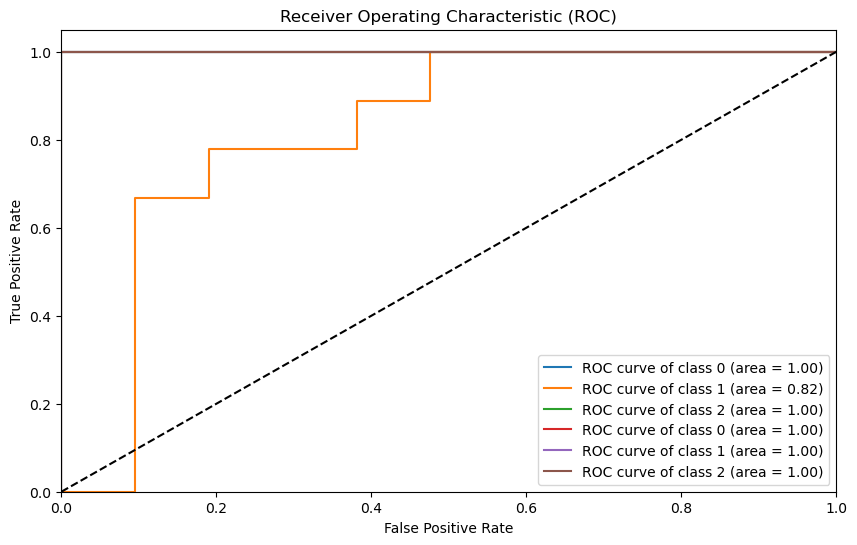

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris data
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y_bin = LabelBinarizer().fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(solver='liblinear')),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier())
}

plt.figure(figsize=(10, 6))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # Receiver Operating Characteristic (ROC) curve, 
    # the AUC represents the probability that the 
    # classifier will rank a randomly chosen positive 
    # instance higher than a randomly chosen negative one.
    # The higher the AUC, the better the model is at 
    # bpredicting 0s as 0s and 1s as 1s.
    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        ### HERE ------->  AUC for each class is calculated as roc_auc
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve
    for i in range(y_test.shape[1]):
        # AUC  printed in the legend of the plot for each class. 
        # AUC It's the number in the legend of the plot labeled as area.
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### AUC 
An excellent model has AUC near to 1, which means it has a good measure of separability.

A poor model has AUC near to 0, which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s.

When AUC is 0.5, it means the model has no class separation capacity whatsoever.

              execution_time   accuracy fit_status   fit
secondmadeknn       0.000029  97.333333    Overfit   NaN
theplainknn         0.012155       96.0        NaN  good


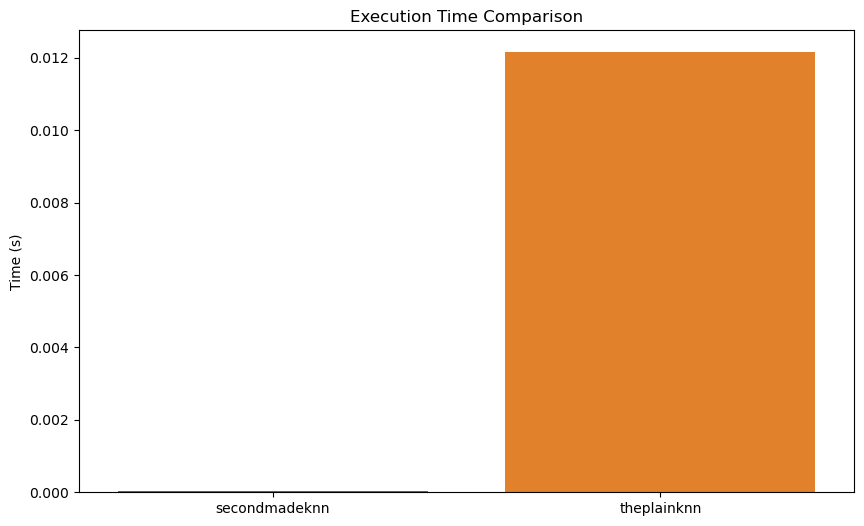

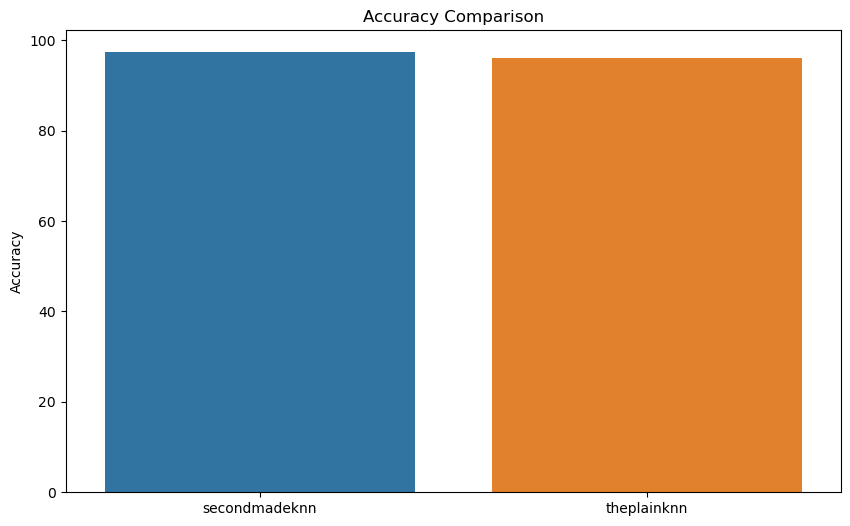

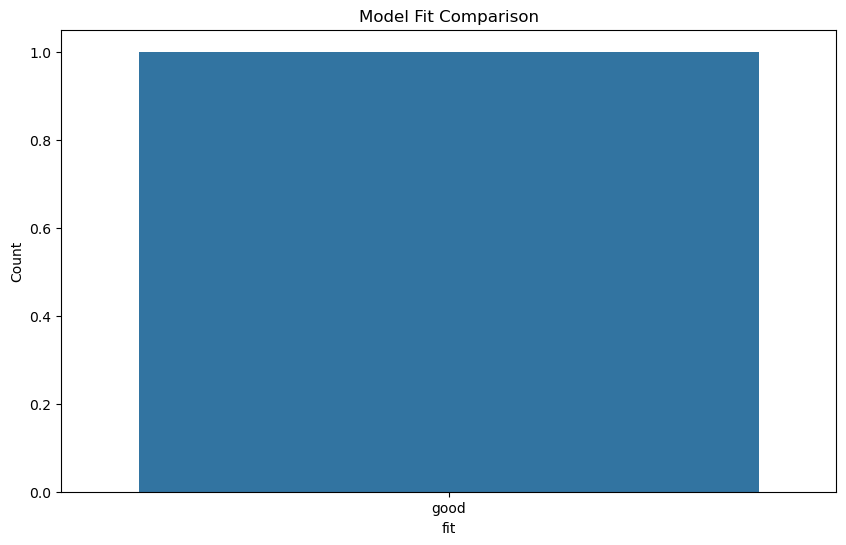

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming performance dictionary contains metrics for each algorithm

# Convert dictionary to pandas DataFrame for easier manipulation and visualization
df = pd.DataFrame(performance).T

# Print the dataframe
print(df)

# Generate a bar plot for comparison of execution time
plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y=df['execution_time'])
plt.title('Execution Time Comparison')
plt.ylabel('Time (s)')
plt.show()

# Generate a bar plot for comparison of accuracy
plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y=df['accuracy'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Generate a count plot for comparison of model fit
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='fit')
plt.title('Model Fit Comparison')
plt.ylabel('Count')
plt.show()
